In [2]:
import utils
import os
import numpy as np
import glob
import cv2
import utils
import pylab as pl
import shutil
import matplotlib.cm as cm
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
%matplotlib inline

In [3]:
# Also load the non-filtered data for evaluation
_d = np.load('../data/data_128_train.npz')
X_train = _d['X'][:,None,:,:]
Y_train = _d['Y'][:,None,:,:]

In [6]:
_d = np.load('../data/data_128_test.npz')
X_test = _d['X']

<matplotlib.colorbar.Colorbar instance at 0x7faddd2fb128>

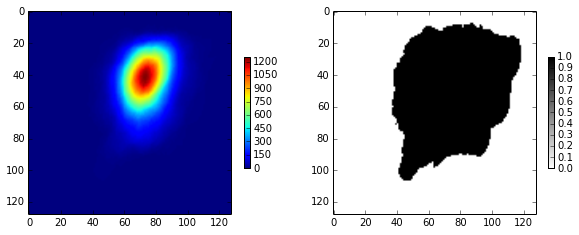

In [18]:
avg_mask = np.sum(Y_train.squeeze(), axis=0)
pl.figure(figsize=(10, 4))
pl.subplot(121)
pl.imshow(avg_mask)
pl.colorbar(shrink=0.5)
pl.subplot(122)
pl.imshow(avg_mask > 3, cmap=cm.binary)
pl.colorbar(shrink=0.5)

<matplotlib.colorbar.Colorbar instance at 0x7faddc353a70>

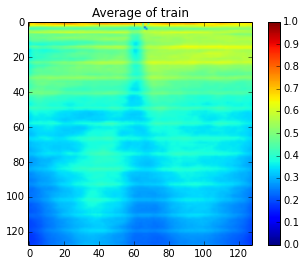

In [25]:
pl.title('Average of train')
pl.imshow(np.mean(X_train.squeeze(), axis=0), vmin=0, vmax=1)
pl.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7faddc1bcb48>

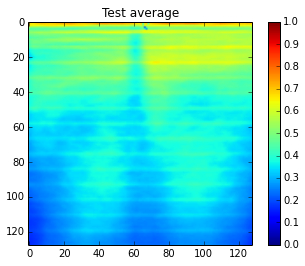

In [26]:
pl.title('Test average')
pl.imshow(np.mean(X_test.squeeze(), axis=0), vmin=0, vmax=1)
pl.colorbar()

# Stats on our predictions

In [27]:
def load_preds():
    PRED_DIR='../../preds'

    test_fnames = ['%d.png' % i for i in range(1,5509)]
    Y_pred = [cv2.imread(os.path.join(PRED_DIR, fname), cv2.IMREAD_GRAYSCALE) for fname in test_fnames]
    return np.array(Y_pred)
Y_pred = load_preds()

<matplotlib.colorbar.Colorbar instance at 0x7fadd6c77f80>

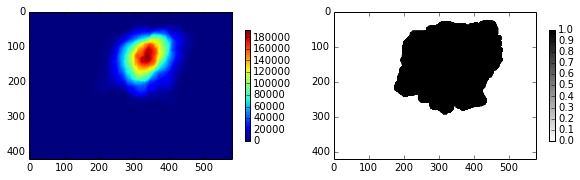

In [34]:
avg_pred = np.sum(Y_pred.squeeze(), axis=0)
pl.figure(figsize=(10, 4))
pl.subplot(121)
pl.imshow(avg_pred)
pl.colorbar(shrink=0.5)
pl.subplot(122)
pl.imshow(avg_pred > 3, cmap=cm.binary)
pl.colorbar(shrink=0.5)